<a href="https://colab.research.google.com/github/alan-chen-lab/MNIST/blob/main/MNIST%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **MNIST手寫辨識 : MLP**

60000 train samples
10000 test samples
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                25120     
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_53 (Dense)            (None, 64)                2112      
                                                                 
 dense_54 (Dense)            (None, 128)               8320      
                                                                 
 dense_55 (Dense)            (None, 10)                1290      
                                                                 
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10

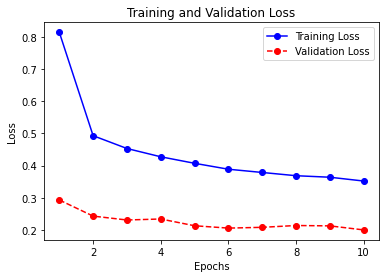

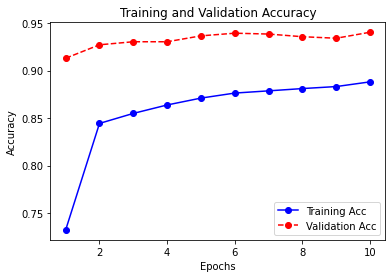

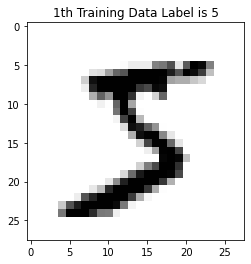

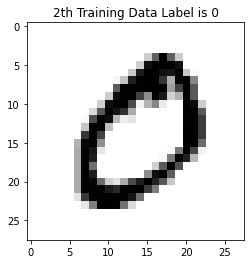

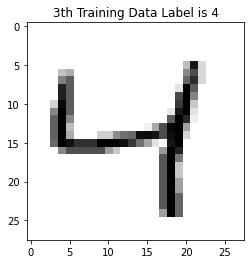

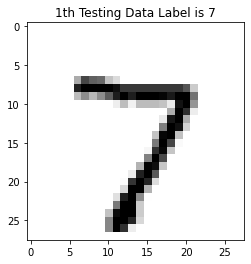

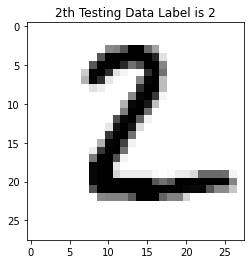

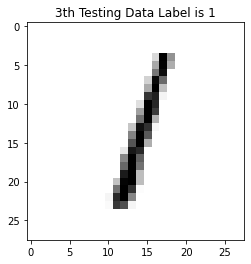

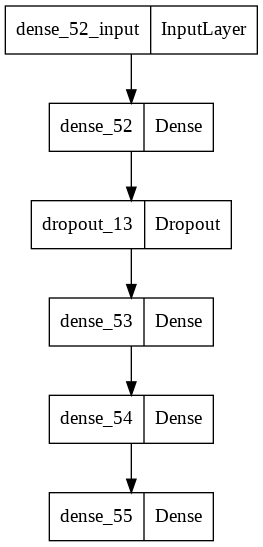

In [14]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將 28*28 圖片轉換成 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Dense(32, input_dim=28*28, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=10, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
score = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = ", score[1])
print("訓練資料集的損失度 = ", score[0])
score1 = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = ", score1[1])
print("測試資料集的損失度 = ", score1[0])
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 顯示訓練圖片
#image = X_test[1] 
#print(image.shape)
#image = np.reshape(image.ravel(), (28, 28))
#plt.imshow(image)
#plt.show()
for i in [0, 1, 2]:
    img = np.reshape(X_train[i, :], (28, 28)) # 28 by 28 matrix 
    label = np.argmax(Y_train[i, :] ) # Label
    plt.imshow(img, cmap='binary')
    plt.title("" + str(i + 1) + "th Training Data " 
              + "Label is " + str(label))
    plt.show()
# 顯示測試圖片
for i in [0, 1, 2]:
    img = np.reshape(X_test[i, :], (28, 28)) # 28 by 28 matrix 
    label = np.argmax(Y_test[i, :] ) # Label
    plt.imshow(img, cmap='binary')
    plt.title("" + str(i + 1) + "th Testing Data " 
              + "Label is " + str(label))
    plt.show()
    
# 顯示模型
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='MLP　model.png')




---


**MNIST 手寫數字分類：CNN**








x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)       

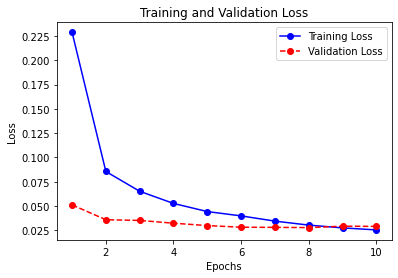

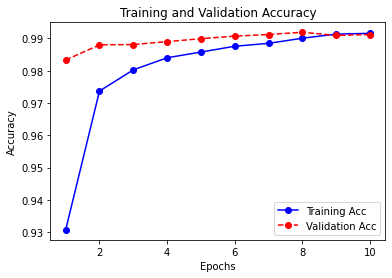

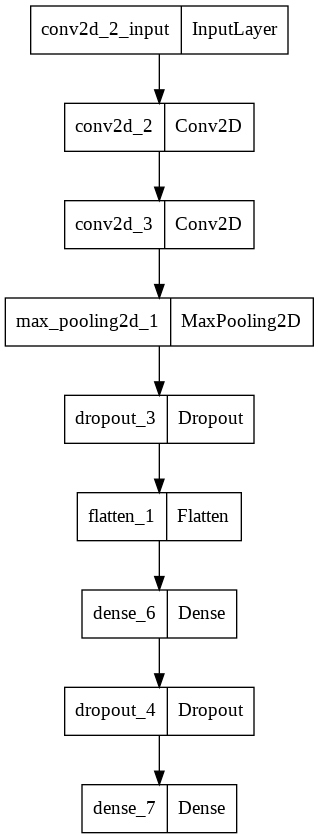

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical

batch_size = 128
num_classes = 10
epochs = 10

# 輸入圖像尺寸
img_rows, img_cols = 28, 28

# 數據(分為訓練和測試集，x:loss y:acc)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 將 28*28 圖片轉換成 784 的向量
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 將類向量轉換為二進制類矩陣(One-hot編碼)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()
# 訓練模型
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
#評估模型
print("\nTesting ...")
score = model.evaluate(x_train, y_train, verbose=0)
print("訓練資料集的準確度 = ", score[1])
print("訓練資料集的損失度 = ", score[0])
score1 = model.evaluate(x_test, y_test, verbose=0)
print("測試資料集的準確度 = ", score1[1])
print("測試資料集的損失度 = ", score1[0])

#顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNN　model.png')

**MNIST手寫數字分類：RNN**

(60000, 28, 28)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1952      
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 13,674
Trainable params: 13,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 - 6s - loss: 0.9212 - 

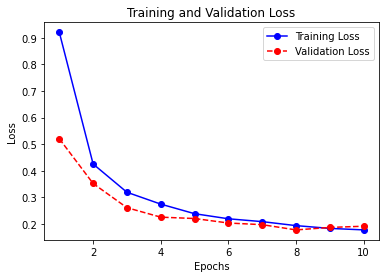

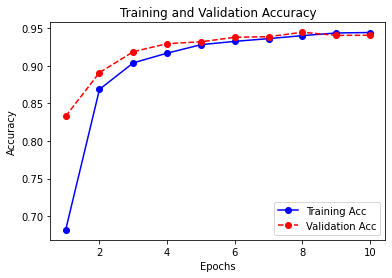

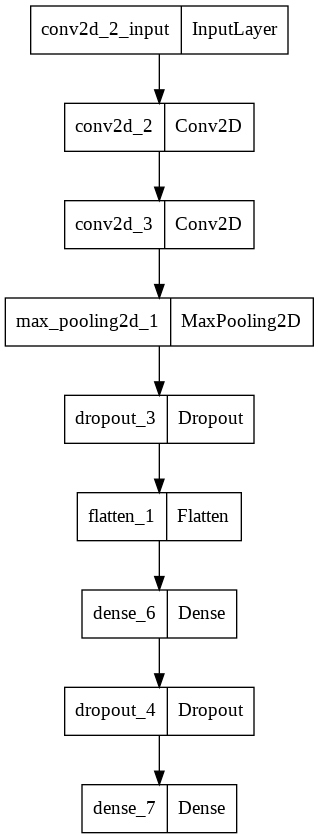

In [ ]:
import tensorflow as tf
from tensorflow.python import keras
from keras.layers import Input, Dense, SimpleRNN, RNN, LSTM
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 標準化數據
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)
# 將類向量轉換為二進制類矩陣(One-hot編碼)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 定義模型
sizeOfBatch = None

inputs = Input(batch_shape=(sizeOfBatch, 28, 28))
RNN1 = SimpleRNN(units=32, activation='relu', return_sequences=False, return_state=False)
RNN1_output= RNN1(inputs)
Dense1_output = Dense(64, activation='relu')(RNN1_output)
Dense2_output = Dense(128, activation='relu')(Dense1_output)      
output = Dense(10, activation='softmax')(Dense2_output)
# 宣告模型
rnn = Model(inputs=inputs, outputs=output)

# 編譯模型
rnn.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
rnn.summary()

# 訓練模型
history = rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=2)

#評估模型
print("\nTesting ...")
score = rnn.evaluate(X_train, y_train, verbose=0)
print("訓練資料集的準確度 = ", score[1])
print("訓練資料集的損失度 = ", score[0])
score1 = rnn.evaluate(X_test, y_test, verbose=0)
print("測試資料集的準確度 = ", score1[1])
print("測試資料集的損失度 = ", score1[0])

#顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='RNN　model.png')